In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.shape

(1460, 3)

In [5]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

**Without using sklearn**

Text(0, 0.5, 'Number_of_House')

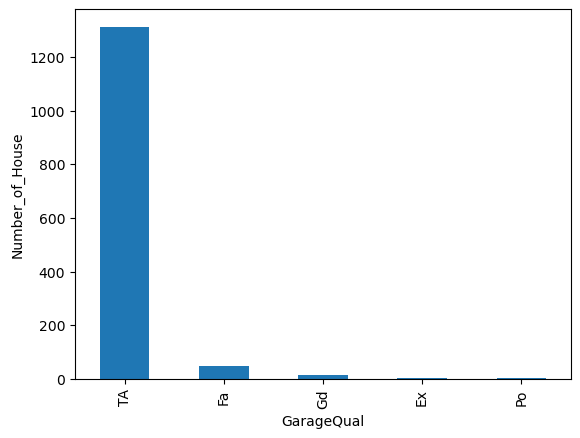

In [7]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number_of_House')

In [8]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

<Axes: ylabel='Density'>

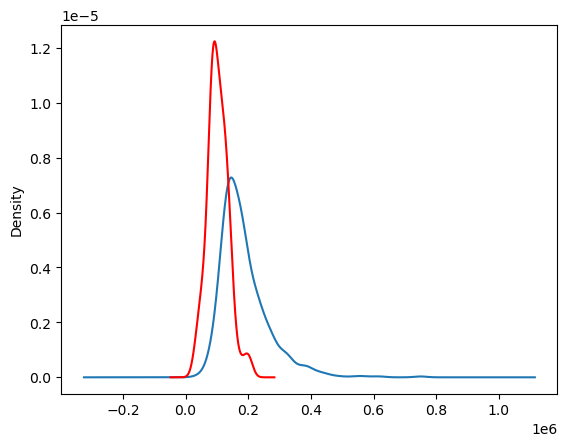

In [9]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

In [10]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [11]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [12]:
df['GarageQual'].fillna('TA',inplace=True)

In [13]:
df.isnull().sum()

FireplaceQu    690
GarageQual       0
SalePrice        0
dtype: int64

<Axes: xlabel='GarageQual'>

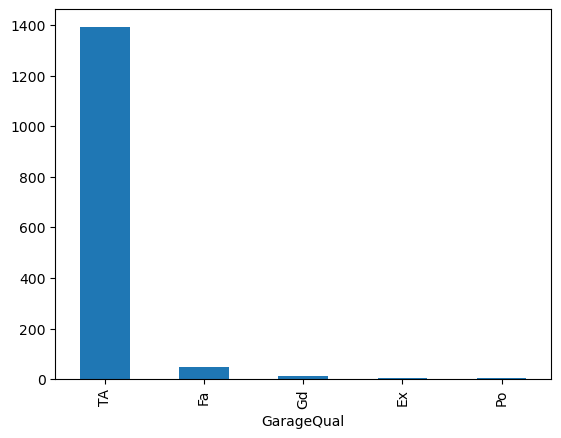

In [14]:
df['GarageQual'].value_counts().plot.bar()

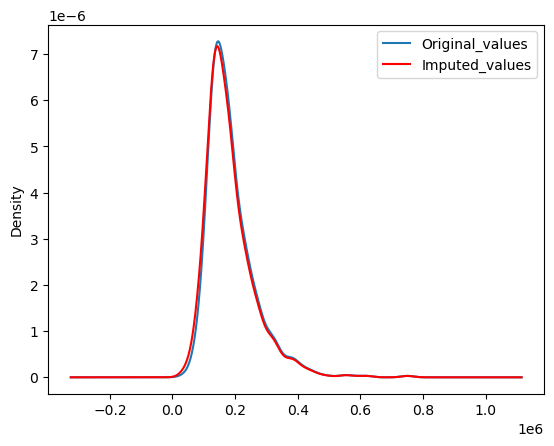

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
#distribution of variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['Original_values','Imputed_values']
ax.legend(lines,labels,loc='best')

<Axes: xlabel='FireplaceQu'>

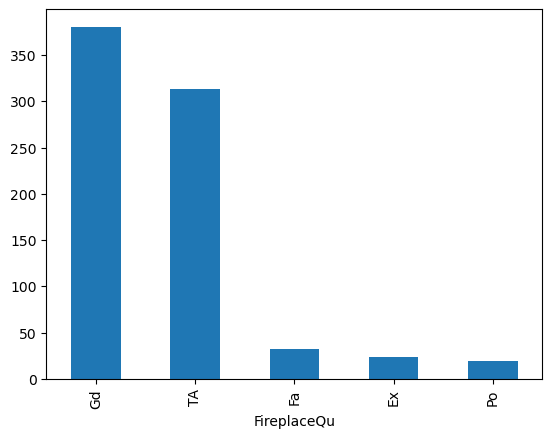

In [16]:
df[	'FireplaceQu'].value_counts().plot.bar()

<Axes: ylabel='Density'>

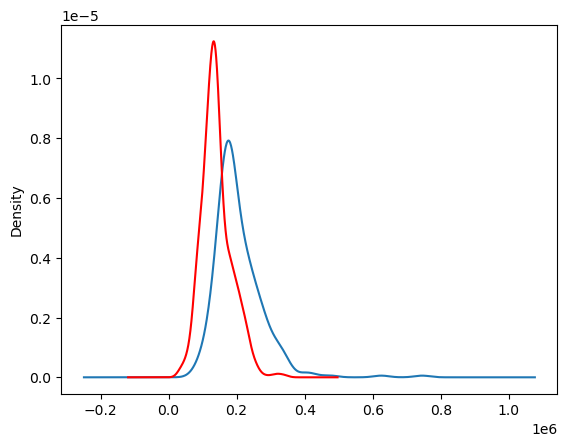

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')


In [18]:
temp1=df[df['FireplaceQu']=='Gd']['SalePrice']

In [19]:
df['FireplaceQu'].fillna('Gd',inplace=True)

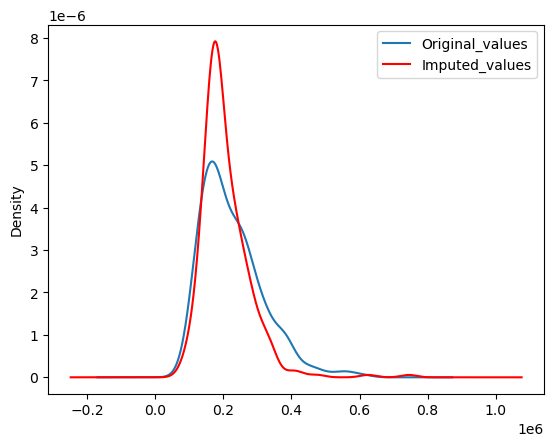

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp1.plot(kind='kde',ax=ax)
#distribution of variable after imputation
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['Original_values','Imputed_values']
ax.legend(lines,labels,loc='best')

**using Sklearn**

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [24]:
impute=SimpleImputer(strategy='most_frequent')

In [25]:
X_train=impute.fit_transform(X_train)
X_test=impute.transform(X_test)

In [26]:
impute.statistics_

array(['Gd', 'TA'], dtype=object)